In [49]:
%reload_ext autoreload
%autoreload 2

In [50]:
import time
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# local imports
from ccp.cca1 import Biclustering
from ccp.data_factory import DataFactory
from ccp.cca2 import CCA



## Importing the data 
In this notebook, we will be exploring the [Gene Expression Data](https://arep.med.harvard.edu/biclustering/yeast.matrix) dataset. Along with the implementation of the biclustering algorithm presented in the paper [Biclustering of Expression Data](https://arep.med.harvard.edu/biclustering/). 
The notebook in divided into three sections:
#### Processing & visualizing the data
In this section, we will be processing and visualizing the data from the yeast matrix dataset associated to the work on this the clustering model was trained.
#### Running the biclustering model
In this section, we will be running the biclustering model on the chosen data. The training will be preformed using CROSS-VALIDATION in order to keep track of the generalization error.
### Visulaizing the results & comparison to the original biclusters
This section will be dedicated to visualizing the results of the biclustering model to the previous biclusters obtrained from the previous work in order to evaluate its accuracy.

# Exploring the data set - Yeast matrix

In [6]:
data_factory = DataFactory()


READ_FILE_PATH = f"{os.getcwd()}/data/raw/yeast_expression.txt"
WRITE_FILE_PATH = f"{os.getcwd()}/data/yeast_expression.csv"
FEATURE_SIZE =17  # fixed value from https://arep.med.harvard.edu/biclustering/

# Preprocess the data
data_factory.clean_file(READ_FILE_PATH, WRITE_FILE_PATH)

### Evaluating the results of the previous experiments

Once the biclusters has been generated. We will evaluate the number of `rows`, `columns` and the `msr` values of every one of them.

####

THis cell is for evaluating the time taken to generate `x` biclusters.

### Preprocessing data & comparing results 
in the following cells we will evaluating the results of the algorithm for exactly `100` biclusters.

In [7]:
# loading the data into a data frame
columns = np.array([f"Cond{i+1}" for i in range(FEATURE_SIZE)])
df = pd.read_csv(WRITE_FILE_PATH, names=columns)

column_names = df.columns.to_list() #extract the name of
data = df.to_numpy()

In [8]:
print(f"Total number of missing values : {np.argwhere(data == -1).shape[0]}")

Total number of missing values : 34


Handling missing values: 

In [98]:
SIGMA = 300
ALPHA=1.2
NB_BICLUSTERS = 100
cca = CCA(sigma=300, alpha=1.2, nb_biclusters=NB_BICLUSTERS, missingval_indicator=-1, row_thr=100, col_thr=50)

In [99]:
from ccp.cca2 import CCA

start_time = time.time()
cca.run(data)
print(f"Time taken to generated {100} biclusters : {time.time() - start_time}")

Time taken to generated 100 biclusters : 0.015062332153320312


In [48]:
# evaluating the results
from ccp.data_factory import DataFactory
import os
EXP_INDEX = 49

df_fact = DataFactory()
df_fact.write_into_csv(cca.biclusters, f'{os.getcwd()}/experiments/yeast-matrix/cca2/exp-{EXP_INDEX}.csv')



### Plotting and visualizing the results

We start by the initial heatmap of the full expression matrix.

In [61]:
data

array([[407, 387, 524, ..., 289, 355, 507],
       [208, 139,  69, ..., 161, 139, 110],
       [425, 429, 451, ..., 494, 458, 484],
       ...,
       [348, 290, 591, ...,   0,  87, 119],
       [208, 240, 256, ..., 220, 179, 240],
       [544, 169, 161, ..., 458, 267, 262]])

/home/ikram/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


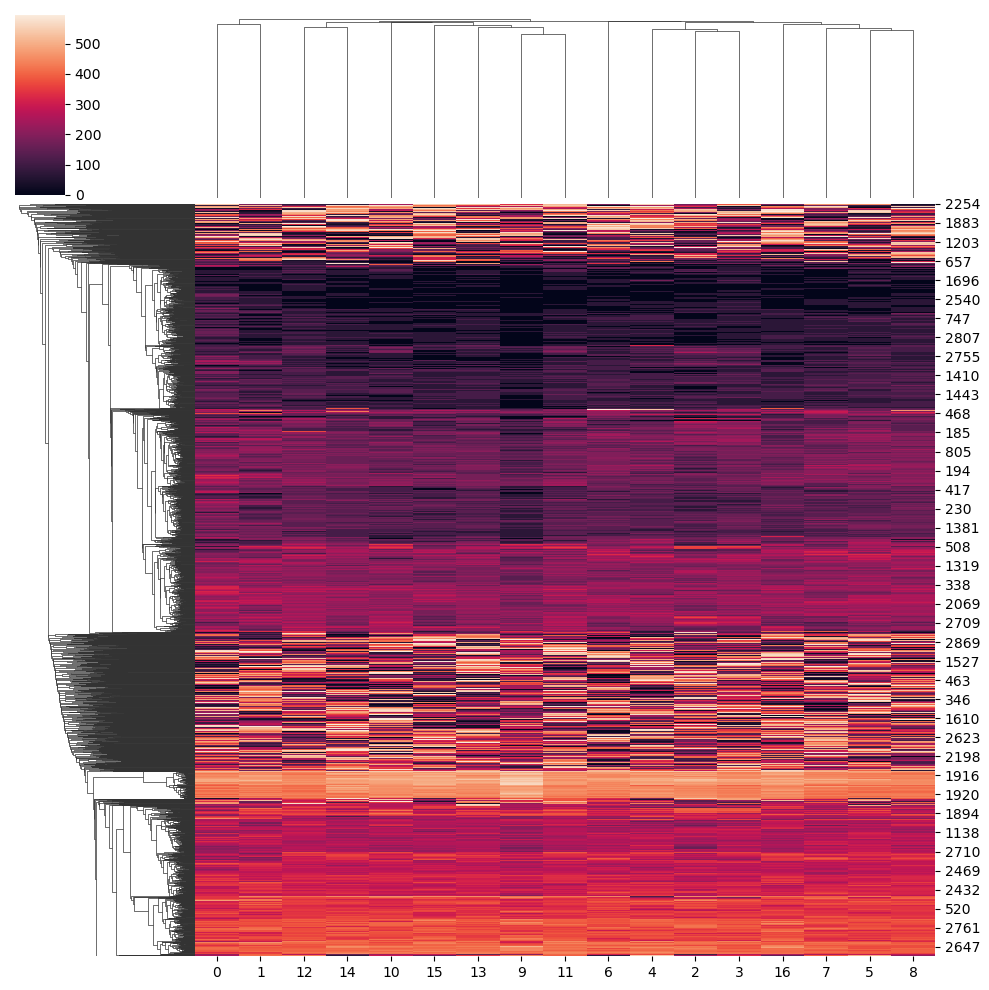

In [26]:
NB_GENES = 17
sns_plot = sns.clustermap(data, xticklabels=np.arange(NB_GENES))
sns_plot.savefig(f"./figures/yeast_exp_46_{NB_GENES}_heatmap.pdf")

Visulizing the first 5 biclusters obtained by the algorithm on experiment n° 46

In [56]:
EXP_INDEX = 46
df = pd.read_csv(f"./experiments/yeast-matrix/cca2/exp-{EXP_INDEX}.csv")
df[['rows', 'columns', 'msr']].mean()

rows        13.500000
columns     16.000000
msr        481.897138
dtype: float64

In [78]:
exp_biclusters  = df.head(n=3)

,rows,columns,msr,row_coverage,column_coverage
0,177,16,223.858763,[ 24 40 41 43 91 109 121 147 149 ...,[ 0 1 2 3 4 5 6 7 8 10 11 12 13 14 15 16]
1,149,16,218.551771,[ 11 17 27 93 98 100 112 122 139 ...,[ 0 1 2 3 4 5 6 7 8 10 11 12 13 14 15 16]
2,33,16,260.408165,[ 342 395 406 422 438 455 621 692 697 ...,[ 0 1 3 4 5 6 7 8 9 10 11 12 13 14 15 16]


In [106]:
rows1_str_cleaned, column1_str_cleaned = exp_biclusters.iloc[0]['row_coverage'].strip('[]').replace('\n', '').split(), exp_biclusters.iloc[0]['column_coverage'].strip('[]').replace('\n', '').split()
rows1_array_int, columns1_array_int = [int(x) for x in rows1_str_cleaned], [int(y) for y in column1_str_cleaned]
b1rows, b1columns = np.array(rows1_array_int), np.array(columns1_array_int)

rows2_str_cleaned, column2_str_cleaned = exp_biclusters.iloc[1]['row_coverage'].strip('[]').replace('\n', '').split(), exp_biclusters.iloc[1]['column_coverage'].strip('[]').replace('\n', '').split()
rows_array2_int, columns2_array_int = [int(x) for x in rows2_str_cleaned], [int(y) for y in column2_str_cleaned]
b2rows, b2columns = np.array(rows_array2_int), np.array(columns2_array_int)


rows3_str_cleaned, column3_str_cleaned = exp_biclusters.iloc[2]['row_coverage'].strip('[]').replace('\n', '').split(), exp_biclusters.iloc[2]['column_coverage'].strip('[]').replace('\n', '').split()
rows_array3_int, columns3_array_int = [int(x) for x in rows3_str_cleaned], [int(y) for y in column3_str_cleaned]
b3rows, b3columns = np.array(rows_array3_int), np.array(columns3_array_int)

In [1]:


sns.clustermap(data[b1rows][:, b1columns], xticklabels=np.arange(NB_GENES),)
sns.clustermap(data[b2rows][:, b2columns], xticklabels=np.arange(NB_GENES))
sns.clustermap(data[b3rows][:, b3columns], xticklabels=np.arange(NB_GENES),)

NameError: name 'sns' is not defined

In [29]:
# upload benchmark results and compare them to the results obained 
benchmark_yeast_bic = pd.read_csv('./data/validation/yeast_expression/benchmark_100_biclusters.csv', names=['rows', 'columns', 'msr', 'total_rows', 'total_columns']).sort_values(by="columns", ascending=False)